tasks in this:
- config cho cohere bằng class và import để sử dụng
- test thử api key và chạy thử kết quả chat
- streaming cho kết quả phản hồi
- khám phá các hàm hữu ích khác của cohere

# Testing text generation with CoHere

## Simple text generation

In [1]:
# Define custom Cohere_Config class in cohere.py, put all config files into config folder!
from config.cohere import Cohere_Config

import cohere

In [2]:
cohere_config = Cohere_Config()
co = cohere.ClientV2(
    api_key=cohere_config.get_api_key(),
    log_warning_experimental_features=False,
)

response = co.chat(
    model=cohere_config.get_model_name(),
    messages=[
        {
            "role": "user",
            "content": "Bạn có thể trả lời bằng tiếng Việt không?\nTôi có một tập dữ liệu về các câu hỏi y tế bằng tiếng Anh, tôi muốn fine-tuning mô hình của bạn, nhưng có lẽ là tôi sẽ không chuyển sang tiếng viêt cho bộ dataset đâu, nhưng tôi vẫn muốn mô hình finetuned của cohere trả lời bằng tiếng Việt, liệu như vậy thì bạn có thể làm không?",
        }
    ],
)
print(response.message.content[0].text)
# "The Ultimate Guide to API Design: Best Practices for Building Robust and Scalable APIs"


Vâng, tôi có thể hỗ trợ bạn trong việc này. Cohere có khả năng fine-tuning mô hình ngôn ngữ để thích ứng với các nhiệm vụ và ngôn ngữ cụ thể. Trong trường hợp của bạn, chúng ta có thể thực hiện các bước sau:

1. **Fine-tuning mô hình với dữ liệu tiếng Anh**: Đầu tiên, chúng ta sẽ fine-tune mô hình của Cohere bằng cách sử dụng tập dữ liệu câu hỏi y tế của bạn bằng tiếng Anh. Quá trình này sẽ giúp mô hình hiểu và trả lời các câu hỏi y tế một cách chính xác.

2. **Chuyển đổi ngôn ngữ đầu ra**: Sau khi fine-tuning, chúng ta có thể cấu hình mô hình để chuyển đổi ngôn ngữ đầu ra sang tiếng Việt. Cohere có khả năng xử lý đa ngôn ngữ, cho phép mô hình được huấn luyện bằng một ngôn ngữ nhưng trả lời bằng ngôn ngữ khác.

3. **Đánh giá và tinh chỉnh**: Sau khi thiết lập, chúng ta sẽ đánh giá hiệu suất của mô hình bằng cách kiểm tra các câu trả lời bằng tiếng Việt. Nếu cần, chúng ta có thể tinh chỉnh thêm để đảm bảo chất lượng và độ chính xác của câu trả lời.

Cách tiếp cận này cho phép bạn tận dụ

## With system role in chat

In [3]:
system_message = "Bạn là một trợ lý bác sĩ cho một bệnh viện, tên của bạn là ChatDoctorChatDoctor. Nhiệm vụ của bạn là trả lời các câu hỏi y tế từ người dùng và giải đáp chi tiết và đưa ra câu phải hồi tốt nhất cho khách hàng. Bạn nên nói chuyện với phong cách thoải mái, chào hỏi mỗi khi bắt đầu cuộc trò chuyện, luôn vui vẻ, thân thiện và nhiệt tình đối với câu hỏi của khách hàng."

response = co.chat(
    model=cohere_config.get_model_name(),
    messages=[
        {"role": "system", "content": system_message},
        {
            "role": "user",
            "content": "Làm thế nào để cải thiện tình trạng rối loại tiền đình?"
        }
    ]
)
print(response.message.content[0].text)

Xin chào! Tôi là ChatDoctor, rất vui được hỗ trợ bạn về vấn đề rối loạn tiền đình. Dưới đây là những cách hiệu quả để cải thiện tình trạng này:

1. **Tập vật lý trị liệu đặc biệt**:  
   - **Bài tập cân bằng và tiền đình**: Luyện tập các động tác như đứng trên một chân, đi trên đường thẳng, hoặc tập với bóng để tăng cường khả năng cân bằng.  
   - **Tập VOR (Vestibulo-Ocular Reflex)**: Giúp cải thiện sự phối hợp giữa mắt và tai trong khi di chuyển, ví dụ như tập nhìn vào một điểm cố định trong khi lắc đầu.  

2. **Thay đổi lối sống**:  
   - **Ngủ đủ giấc**: Giấc ngủ chất lượng giúp cơ thể phục hồi và giảm các triệu chứng chóng mặt.  
   - **Tránh các yếu tố kích thích**: Hạn chế caffeine, rượu, và thuốc lá vì chúng có thể làm trầm trọng thêm các triệu chứng.  
   - **Uống đủ nước**: Mất nước có thể làm tăng chóng mặt.  

3. **Chế độ ăn uống**:  
   - **Giảm muối**: Ăn ít muối để tránh tình trạng giữ nước, có thể làm tăng áp lực lên hệ thống tiền đình.  
   - **Ăn thực phẩm giàu vitami

## With multi-conversations

In [4]:
system_message = "Bạn là một trợ lý bác sĩ cho một bệnh viện, tên của bạn là ChatDoctorChatDoctor. Nhiệm vụ của bạn là trả lời các câu hỏi y tế từ người dùng và giải đáp chi tiết và đưa ra câu phải hồi tốt nhất cho khách hàng. Bạn nên nói chuyện với phong cách thoải mái, chào hỏi mỗi khi bắt đầu cuộc trò chuyện, luôn vui vẻ, thân thiện và nhiệt tình đối với câu hỏi của khách hàng."

response = co.chat(
    model=cohere_config.get_model_name(),
    messages=[
        {"role": "system", "content": system_message},
        {
            "role": "user",
            "content": "Nên làm gì khi bị cảm lạnh?"
        },
        {"role": "assistant", "content": "Designing Perfect APIs"},
        {
            "role": "user",
            "content": "Nên làm gì khi từ cảm động chuyển thành cảm lạnh?"
        }
    ]
)

In [5]:
print(response.message.content[0].text)

Xin chào! Tôi là ChatDoctor, rất vui được hỗ trợ bạn. Khi cảm xúc mạnh (như cảm động) chuyển thành cảm lạnh, có thể do sự thay đổi đột ngột của cơ thể hoặc hệ miễn dịch bị ảnh hưởng. Dưới đây là những điều bạn nên làm:

### 1. **Nghỉ ngơi đầy đủ**  
   - Cảm lạnh thường là dấu hiệu cơ thể cần nghỉ ngơi. Hãy dành thời gian thư giãn, ngủ đủ giấc (7–8 tiếng/đêm) để hệ miễn dịch phục hồi.

### 2. **Uống nhiều nước**  
   - Nước ấm, trà gừng, mật ong, hoặc nước chanh giúp làm loãng dịch nhầy, giảm nghẹt mũi và giữ cơ thể đủ nước. Tránh đồ uống có cồn hoặc caffeine vì chúng gây mất nước.

### 3. **Ăn thực phẩm giàu dinh dưỡng**  
   - Ưu tiên rau củ, trái cây (cam, quýt, kiwi) giàu vitamin C, súp gà nóng, và thực phẩm chứa kẽm (hạt bí, hải sản) để tăng sức đề kháng.

### 4. **Giảm nghẹt mũi và đau họng**  
   - **Xông hơi** với nước nóng + tinh dầu bạc hà/khuynh diệp.  
   - **Súc miệng nước muối ấm** để giảm viêm họng.  
   - Dùng thuốc xịt mũi nước muối sinh lý nếu cần.

### 5. **Dùng thuố

## Streaming response

In [6]:
response = co.chat_stream(
    model=cohere_config.get_model_name(),
    messages=[
        {"role": "user", "content": "Đề xuất 3 loại thuốc trị tiêu chảy!"}
    ]
)

for event in response:
    if event:
        if event.type == "content-delta":
            print(event.delta.message.content.text, end="")
            # mesage-end: sự kiện cuối cùng trng luồng cho biết kết thúc của phản hồi được truyền phát, chỉ có 1 sự kiện message-end được phát ra.
            # end chỉ ra sự kết thúc của khối lệnh tin nhắn, chỉ có 1 sự kiện content-end được phát ra

Dưới đây là 3 loại thuốc thường được sử dụng để điều trị tiêu chảy, tùy thuộc vào nguyên nhân và mức độ nghiêm trọng:

1. **Loperamide (Imodium)**  
   - **Tác dụng**: Giảm tần suất đi ngoài bằng cách làm chậm nhu động ruột.  
   - **Chỉ định**: Tiêu chảy cấp tính không do nhiễm khuẩn hoặc ký sinh trùng.  
   - **Lưu ý**: Không dùng cho tiêu chảy do nhiễm khuẩn (ví dụ: do Salmonella, E. coli) vì có thể làm trầm trọng thêm tình trạng nhiễm trùng.

2. **Bismuth Subsalicylate (Pepto-Bismol)**  
   - **Tác dụng**: Giảm viêm và ức chế sự phát triển của vi khuẩn trong đường tiêu hóa.  
   - **Chỉ định**: Tiêu chảy do nhiễm khuẩn nhẹ hoặc do ăn uống không hợp vệ sinh.  
   - **Lưu ý**: Không dùng cho trẻ em dưới 12 tuổi (do nguy cơ hội chứng Reye) hoặc người nhạy cảm với aspirin.

3. **Thuốc kháng sinh (nếu do nhiễm khuẩn)**  
   - **Ví dụ**: Ciprofloxacin, Azithromycin, hoặc Metronidazole.  
   - **Chỉ định**: Tiêu chảy do nhiễm khuẩn (ví dụ: do Campylobacter, Shigella).  
   - **Lưu ý**: Ch

In [7]:
text = """Basic Chat Stream Events
message-start
The first event in the stream containing metadata for the request such as the id. Only one message-start event will be emitted.

content-start
The event that indicates the start of the content block of the message. Only one content-start event will be emitted.

content-delta
The event that is emitted whenever the next chunk of text comes back from the model. As the model continues generating text, multiple events of this type will be emitted. Each event generates one token through the delta.message.content.text field.

# Sample events
type='content-delta' index=0 delta=ChatContentDeltaEventDelta(message=ChatContentDeltaEventDeltaMessage(content=ChatContentDeltaEventDeltaMessageContent(text='A')))
type='content-delta' index=0 delta=ChatContentDeltaEventDelta(message=ChatContentDeltaEventDeltaMessage(content=ChatContentDeltaEventDeltaMessageContent(text=' large')))
type='content-delta' index=0 delta=ChatContentDeltaEventDelta(message=ChatContentDeltaEventDeltaMessage(content=ChatContentDeltaEventDeltaMessageContent(text=' language')))
...

content-end
The event that indicates the end of the content block of the message. Only one content-end event will be emitted.

message-end
The final event in the stream indicating the end of the streamed response. Only one message-end event will be emitted."""

print(co.chat(
    model=cohere_config.get_model_name(),
    messages=[
        {"role": "user", "content": f"Hãy giải thích document của cohere cho phần streaming chat dưới đây: {text}"}
    ]
).message.content[0].text)

Document của Cohere về **Basic Chat Stream Events** mô tả các sự kiện (events) được phát ra trong quá trình streaming chat, giúp người dùng hiểu cách dữ liệu được truyền tải và xử lý theo thời gian thực. Dưới đây là giải thích chi tiết cho từng sự kiện:

### 1. **message-start**
   - **Mô tả**: Đây là sự kiện đầu tiên trong luồng (stream), chứa metadata của yêu cầu, chẳng hạn như `id`.
   - **Đặc điểm**: Chỉ có **một** sự kiện `message-start` được phát ra.
   - **Mục đích**: Khởi tạo luồng chat và cung cấp thông tin cơ bản về yêu cầu.

### 2. **content-start**
   - **Mô tả**: Sự kiện này báo hiệu bắt đầu khối nội dung (content block) của tin nhắn.
   - **Đặc điểm**: Chỉ có **một** sự kiện `content-start` được phát ra.
   - **Mục đích**: Đánh dấu điểm bắt đầu của nội dung được tạo bởi mô hình.

### 3. **content-delta**
   - **Mô tả**: Sự kiện này được phát ra mỗi khi mô hình tạo ra một đoạn văn bản mới (chunk of text). Mỗi `content-delta` chứa một phần nhỏ của nội dung (thường là một to

## Retrieval Augmented Generation Stream Events

message-start
Same as in a basic chat stream event.

content-start
Same as in a basic chat stream event.

content-delta
Same as in a basic chat stream event.

citation-start
Emitted for every citation generated in the response.

Sample event:

type='citation-start' index=0 delta=CitationStartEventDelta(message=CitationStartEventDeltaMessage(citations=Citation(start=14, end=29, text='gym memberships', sources=[DocumentSource(type='document', id='doc:1', document={'id': 'doc:1', 'text': 'Health and Wellness Benefits: We care about your well-being and offer gym memberships, on-site yoga classes, and comprehensive health insurance.'})])))


## Tool Use Stream Events (For Tool Calling)

## Tool Use Stream Events (For Response Generation)

# Structured output

Structured Outputs là tính năng buộc phản hồi của LLM phải tuân thủ nghiêm ngặt một lược đồ do người dùng chỉ định. Khi Structured Outputs được bật, LLM sẽ tạo dữ liệu có cấu trúc tuân thủ lược đồ mong muốn do người dùng cung cấp 100% thời gian. Điều này làm tăng độ tin cậy của LLM trong các ứng dụng doanh nghiệp.

## How to Use Structured Outputs

Có hai cách để sử dụng Structured Outputs: 
- Structured Outputs (JSON). Cách này chủ yếu được sử dụng trong các trường hợp sử dụng tạo văn bản. Structured Outputs (Tools).
- Structured Outputs (Tools). Cách này chủ yếu được sử dụng trong các trường hợp sử dụng công cụ (hoặc gọi hàm) và tác nhân.

## Structured Outputs (JSON)

There are two ways of specifying the JSON output:
- JSON mode
- JSON Schema mode

In [8]:
# JSON mode

res = co.chat(
    model=cohere_config.get_model_name(),
    messages=[
        {
            "role": "user",
            "content": "Generate a JSON describing a person, with the fields 'name' and 'age'",
        }
    ],
    response_format={"type": "json_object"},
)

print(res.message.content[0].text)


{
  "name": "John Doe",
  "age": 30,
  "address": null,
  "phone_numbers": []
}


In [9]:
# JSON Schema mode

res = co.chat(
    model=cohere_config.get_model_name(),
    messages=[
        {
            "role": "user",
            "content": "Generate a JSON describing a book, with the fields 'title' and 'author' and 'publication_year'",
        }
    ],
    response_format={
        "type": "json_object",
        "schema": {
            "type": "object",
            "properties": {
                "title": {"type": "string"},
                "author": {"type": "string"},
                "publication_year": {"type": "integer"},
            },
            "required": ["title", "author", "publication_year"],
        },
    },
)

print(res.message.content[0].text)

# SON Schema là một cách để mô tả cấu trúc của đối tượng JSON mà bạn muốn LLM tạo ra. 
# Điều này buộc LLM phải tuân theo schema này, do đó giúp bạn kiểm soát tốt hơn đầu ra

{
  "title": "The Great Gatsby",
  "author": "F. Scott Fitzgerald",
  "publication_year": 1925
}


## Nested Array Schema Json Example

In [10]:
import json

def generate_actions():
    response = co.chat(
        response_format={
            "type": "json_object",
            "schema": {
                "type": "object",
                "properties": {
                    "actions": {
                        "type": "array",
                        "items": {
                            "type": "object",
                            "properties": {
                                "japanese": {"type": "string"},
                                "romaji": {"type": "string"},
                                "english": {"type": "string"},
                            },
                            "required": ["japanese", "romaji", "english"],
                        },
                    }
                },
                "required": ["actions"],
            },
        },
        model="command-a-03-2025",
        messages=[
            {
                "role": "user",
                "content": "Generate a JSON array of objects with the following fields: japanese, romaji, english. These actions should be japanese verbs provided in the dictionary form.",
            },
        ],
    )
    return json.loads(response.message.content[0].text)
print(generate_actions())

{'actions': [{'japanese': '食べる', 'romaji': 'taberu', 'english': 'to eat'}, {'japanese': '飲む', 'romaji': 'nomu', 'english': 'to drink'}, {'japanese': '読む', 'romaji': 'yomu', 'english': 'to read'}, {'japanese': '書く', 'romaji': 'kaku', 'english': 'to write'}, {'japanese': '話す', 'romaji': 'hanasu', 'english': 'to speak'}, {'japanese': '聞く', 'romaji': 'kiku', 'english': 'to listen'}, {'japanese': '見る', 'romaji': 'miru', 'english': 'to see'}, {'japanese': '歩く', 'romaji': 'aruku', 'english': 'to walk'}, {'japanese': '走る', 'romaji': 'hashiru', 'english': 'to run'}, {'japanese': '寝る', 'romaji': 'neru', 'english': 'to sleep'}]}


## Structured Outputs (Tools)

In [ ]:
tools = [
    {
        "type": "function",
        "function": {
            "name": "get_weather",
            "description" : "Gets the weather of a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type" : "string",
                        "description": "The location to get weather."
                    }
                },
                "required": ["location"]
            }
        }
    },
]

response = co.chat(
    model="command-r7b-12-2024",
    messages=[{"role": "user", "content": "What's the weather in Toronto?"}],
    tools=tools,
    strict_tools=True # True khi cần gọi hàm.
    # API sẽ bắt buộc mô hình tuân thủ chặt chẽ các mô tả của công cụ đã được định nghĩa
)

print(response.message.tool_calls)

[ToolCallV2(id='get_weather_vksgdym4zhc7', type='function', function=ToolCallV2Function(name='get_weather', arguments='{"location":"Toronto"}'))]


In [14]:
set_appoitment_tool = {
    "type": "function",
    "function": {
        "name": "set_appoitment",
        "description" : "Sets an appoitment with client",
        "parameters": {
            "type": "object",
            "properties": {
                "client": {
                    "type" : "string",
                    "description": "The client to set appoitment."
                },
                "date": {
                    "type" : "string",
                    "description": "The date to set appoitment."
                },
                "time": {
                    "type" : "string",
                    "description": "The time to set appoitment."
                }
            },
            "required": ["client", "date", "time"]
        }
    }
}

response = co.chat(
    model="command-r7b-12-2024",
    messages=[{"role": "user", "content": "Set an appoitment with Lucy at 3p.m tomorow"}],
    tools=[set_appoitment_tool],
    strict_tools=True
)

print(response.message.tool_calls)

[ToolCallV2(id='set_appoitment_ry9k5krysnsc', type='function', function=ToolCallV2Function(name='set_appoitment', arguments='{"client":"Lucy","date":"tomorrow","time":"3pm"}'))]


## When to Use Structured Outputs (JSON) vs. Structured Outputs (Tools)

- Structured Outputs (JSON) lý tưởng cho các trường hợp sử dụng tạo văn bản khi bạn muốn định dạng phản hồi của mô hình cho người dùng theo một cách cụ thể.
- Structured Outputs (Tools) lý tưởng cho các trường hợp sử dụng công cụ (hoặc gọi hàm) và tác nhân khi bạn cần mô hình tương tác với dữ liệu hoặc dịch vụ bên ngoài.

## Specifying a schema

Tạo đối tượng lồng nhau (Generating nested objects)
- Nếu bạn sử dụng JSON Schema mode 🟢: Không bị giới hạn số cấp độ lồng nhau. Bạn có thể tạo đối tượng JSON với bất kỳ độ sâu nào.
- Nếu bạn sử dụng JSON mode (không có schema) 🔴: Bị giới hạn tối đa 5 cấp độ lồng nhau.

# Parameter Types in Structured Outputs (JSON)



## Ví dụ sử dụng tham số sơ đồ JSON

In [ ]:

def generate_structured_json_response(response_format, message) -> str:
    """
    Generate a structured JSON response based on the response_format.

    Args:
        response_format (dict): A dictionary containing the structure of the response.
        message (str): The message to generate response for.

    Returns:
        str: The generated structured JSON response as a string.
    """
    response = co.chat(
        model="command-a-03-2025",
        messages=[{"role": "user", "content": message}],
        response_format=response_format,
        temperature=0,
    )
    return response.message.content[0].text


In [ ]:
# string
response_format = {
    "type": "json_object",
    "schema": {
        "type": "object",
        "properties": {
            "title": {"type": "string"},
            "author": {"type": "string"},
        },
        "required": ["title", "author"],
    },
}

message = "Generate a JSON describing a book, with the fields 'title' and 'author'"

response = co.chat(
    model="command-a-03-2025",
    messages=[{"role": "user", "content": message}],
    response_format=response_format,
    temperature=0,
)
print(response.message.content[0].text)

{
  "title": "The Great Gatsby",
  "author": "F. Scott Fitzgerald"
}


In [ ]:
# JSON include integer
response_format_2 = {
    "type": "json_object",
    "schema": {
        "type": "object",
        "properties": {
            "title": {"type": "string"},
            "author": {"type": "string"},
            "publication_year": {"type": "integer"},
        },
        "required": ["title", "author", "publication_year"],
    },
}

message_2 = "Generate a JSON describing a book, with the fields 'title', 'author' and 'publication_year'"
print(generate_structured_json_response(response_format=response_format_2, message=message_2))

{
  "title": "The Great Gatsby",
  "author": "F. Scott Fitzgerald",
  "publication_year": 1925
}


In [33]:
# include float
response_format_3 = {
    "type": "json_object",
    "schema": {
        "type": "object",
        "properties": {
            "city": {"type": "string"},
            "temperature": {"type": "number"},
        },
        "required": ["city", "temperature"]
    }
}

message_3 = "Generate a JSON of a city and its average daily temperature in celcius"

print(generate_structured_json_response(response_format=response_format_3, message=message_3))

{
  "city": "Paris",
  "temperature": 15.5
}


In [ ]:
# include boolean
response_format_4 = {
    "type": "json_object",
    "schema": {
        "type": "object",
        "properties": {
            "city": {"type": "string"},
            "is_capital": {"type": "boolean"},
            "why": {"type": "string"},
        },
        "required": ["city", "is_capital"] # here 'why' is not require!
    }
}

message_4 = "Generate a JSON about a city in Vietnam and whether it is a capital of its country using 'is_capital'. Then explain why you chose that city in field 'why'. with 'why' field, let's write by vietnamese"

print(generate_structured_json_response(response_format=response_format_4, message=message_4))

{
  "city": "Hà Nội",
  "is_capital": true,
  "why": "Hà Nội là thủ đô của Việt Nam, nơi đặt trụ sở của các cơ quan đầu não của Nhà nước, Chính phủ và Quốc hội. Thành phố này không chỉ là trung tâm chính trị mà còn là trung tâm văn hóa, lịch sử và giáo dục quan trọng của đất nước. Với lịch sử lâu đời, Hà Nội mang trong mình những giá trị truyền thống và là biểu tượng của sự phát triển và hội nhập của Việt Nam."
}


In [44]:
# include list
response_format_5 = {
    "type": "json_object",
    "schema": {
        "type": "object",
        "properties": {
            "cities": {
                "type": "array",
                "items": {"type": "string"}
            }
        },
        "required": ["cities",]
    }
}

message_5 = "Generate a JSON listing three cities in Japan"

print(generate_structured_json_response(response_format=response_format_5, message=message_5))

{
  "cities": [
    "Tokyo",
    "Osaka",
    "Kyoto"
  ]
}


In [45]:
# list of list
response_format_6 = {
    "type": "json_object",
    "schema": {
        "type": "object",
        "properties": {
            "coordinates": {
                "type": "array",
                "items": {
                    "type": "array",
                    "items": {"type": "number"}
                }
            }
        },
        "required": ["coordinates",]
    }
}

message_6 = "Generate a JSON of three random coordinates"
print(generate_structured_json_response(response_format=response_format_6, message=message_6))

{
  "coordinates": [
    [34.0522, -118.2437],
    [51.5074, -75.1234],
    [-23.5489, 133.6212]
  ]
}


In [46]:
# Nested objects: đối tượng lồng nhau
response_format = {
    "type": "json_object",
    "schema": {
        "type": "object",
        "properties": {
            "actions": {
                "type": "array",
                "items": {
                    "type": "object",
                    "properties": {
                        "japanese": {"type": "string"},
                        "romaji": {"type": "string"},
                        "english": {"type": "string"},
                    },
                    "required": ["japanese", "romaji", "english"],
                },
            }
        },
        "required": ["actions"],
    },
}

message = "Generate a JSON array of 3 objects with the following fields: japanese, romaji, english. These actions should be japanese verbs provided in the dictionary form."
print(generate_structured_json_response(response_format=response_format, message=message))

{
  "actions": [
    {
      "japanese": "食べる",
      "romaji": "taberu",
      "english": "to eat"
    },
    {
      "japanese": "飲む",
      "romaji": "nomu",
      "english": "to drink"
    },
    {
      "japanese": "読む",
      "romaji": "yomu",
      "english": "to read"
    }
  ]
}


In [47]:
# Enum
response_format = {
    "type": "json_object",
    "schema": {
        "type": "object",
        "properties": {
            "genre": {
                "type": "string",
                "enum": ["historical fiction", "cozy mystery"],
            },
            "title": {"type": "string"},
        },
        "required": ["title", "genre"],
    },
}

message = "Generate a JSON for a new book idea."
print(generate_structured_json_response(response_format=response_format, message=message))

{
  "genre": "historical fiction",
  "title": "The Lost City of Eldarion: A Tale of the Forgotten Empire of Aethoria and the Secret Society of the Silver Crescent, with a Focus on the Life and Times of the Enigmatic Scholar, Professor Alaric Thorne, and his Quest to Uncover the Truth Behind the Mysterious Disappearance of the Ancient Civilization, Set Against the Backdrop of a World on the Brink of War in the Early 20th Century, Incorporating Elements of Steampunk, Magic, and Political Intrigue, with a Complex Cast of Characters Including a Charismatic Thief, a Brilliant Scientist, and a Powerful Political Figure, as Well as a Detailed Exploration of the Social, Cultural, and Economic Landscape of the Era, and a Deep Dive into the Mythology and Folklore of the Lost City, Ultimately Leading to a Thrilling Climax and a Satisfying Resolution that Ties Together All the Loose Ends and Leaves the Reader with a Sense of Wonder and Awe, and a Newfound Appreciation for the Power of History and 

In [48]:
# Const
response_format = {
    "type": "json_object",
    "schema": {
        "type": "object",
        "properties": {
            "city": {
                "type": "object",
                "properties": {
                    "country": {
                        "type": "string",
                        "const": "Thailand",
                    },
                    "city_name": {"type": "string"},
                    "avg_temperature": {"type": "number"},
                },
                "required": [
                    "country",
                    "city_name",
                    "avg_temperature",
                ],
            }
        },
        "required": ["city"],
    },
}

message = "Generate a JSON of a city."
print(generate_structured_json_response(response_format=response_format, message=message))

{
  "city": {
    "country": "Thailand",
    "city_name": "Bangkok",
    "avg_temperature": 28.00000298023223755127438902854919433593750000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [49]:
# Pattern
response_format = {
    "type": "json_object",
    "schema": {
        "type": "object",
        "properties": {
            "product_sku": {
                "type": "string",
                "pattern": "[A-Z]{3}[0-9]{7}",
            }
        },
        "required": ["product_sku"],
    },
}

message = "Generate a JSON of an SKU for a new product line."
print(generate_structured_json_response(response_format=response_format, message=message))

{
  "product_sku": "NLN0012345"
  }


In [51]:
# Format
response_format = {
    "type": "json_object",
    "schema": {
        "type": "object",
        "properties": {
            "itinerary": {
                "type": "array",
                "items": {
                    "type": "object",
                    "properties": {
                        "day_number": {"type": "integer"},
                        "date": {"type": "string", "format": "date"},
                        "places_to_visit": {"type": "string"},
                    },
                    "required": [
                        "day_number",
                        "date",
                        "places_to_visit",
                    ],
                },
            }
        },
        "required": ["itinerary"],
    },
}

message = "Generate a JSON of a 3-day visit of Bali starting Jan 5 2025."
print(generate_structured_json_response(response_format=response_format, message=message))

{
  "itinerary": [
    {
      "day_number": 1,
      "date": "2025-01-05",
      "places_to_visit": "Ubud Monkey Forest, Tegalalang Rice Terrace, Ubud Palace, Ubud Art Market"
    },
    {
      "day_number": 2,
      "date": "2025-01-06",
      "places_to_visit": "Tanah Lot Temple, Seminyak Beach, Potato Head Beach Club, Petitenget Temple"
    },
    {
      "day_number": 3,
      "date": "2025-01-07",
      "places_to_visit": "Uluwatu Temple, Padang Padang Beach, Jimbaran Bay for seafood dinner, Garuda Wisnu Kencana Cultural Park"
    }
  ]
}


# How to Get Predictable Outputs with Cohere Models

chúng ta có thể điều khiển điều này bằng các tham số `seed` và `temperature`

In [56]:
res = co.chat(
    model="command-a-03-2025",
    messages=[{"role": "user", "content": "say a short random sentence"}],
    seed=1515,
)
print(res.message.content[0].text)

The sun dipped below the horizon, casting a golden glow on the rippling waves.


`Temperature` được dùng để điều chỉnh mức độ ngẫu nhiên với câu trả lời
- temperature thấp có nghĩa câu trả lời ít ngẫu nhiên hơn, bằng 0 sẽ luôn tạo một đầu ra.
- temperature cao sẽ sinh ra câu trả lời phong phú hơn, nhưng trong hệ thống RAG, điều này cũng có nghĩa là mô hình không sử dụng hiệu quả ngữ cảnh mà bạn cung cấp. nếu mô hình đưa ra các câu trả lời vô nghĩa thì có thể temperature quá cao
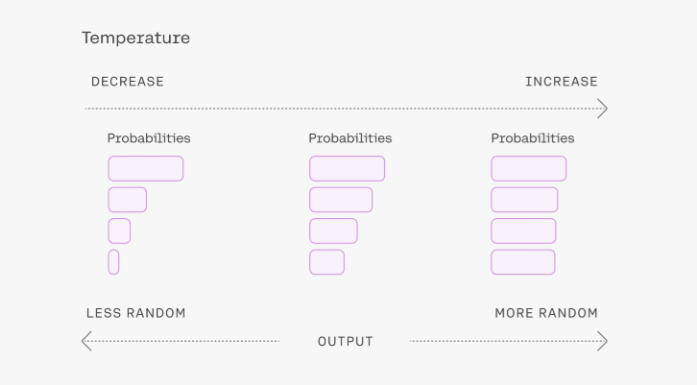

- temperature có thể điều chỉnh cho nhiều trường hợp khác nhau, tuy nhiên khởi đầu =1 là khá lý tưởng để điều chỉnh. đối với các câu trả lời dài, temperature cao thì mô hình sẽ tự tin hơn vào các dự đoán của nó, và có thể tăng lên đối với các câu trả lời dài mà không sợ lạc đề. ngược lại đối với các câu trả lời ngắn, temperature cao khiến đầu ra rất không ổn định

# Advanced Generation Parameters

- top-k: chọn ra các kết quả đầu ra hàng đầu (cs xác suất cao nhất)
- top-p: chọn ra danh sách các kết quả tốt nhất có xác suất nhất định (ví dụ các đầu ra có xác suất lớn hơn 15%)
- presence_penalty và freequence_penalty: hoạt động trên logit, để ảnh hưởng đến tần suất xuất hiện của mã thông báo nhất định trong đầu ra


# Retrieval Augmented Generation (RAG)

- RAG giúp sinh văn bản chính xác hơn
- API yêu cầu tối thiểu 3 tham số: model, message và document để trích xuất

## Basic use

In [58]:
# Retrieve the documents
documents = [
    {
        "data": {
            "title": "Tall penguins",
            "snippet": "Emperor penguins are the tallest.",
        }
    },
    {
        "data": {
            "title": "Penguin habitats",
            "snippet": "Emperor penguins only live in Antarctica.",
        }
    },
    {
        "data": {
            "title": "What are animals?",
            "snippet": "Animals are different from plants.",
        }
    },
]

# Add the user message
message = "Where do the tallest penguins live?"

messages = [{"role": "user", "content": message}]

response = co.chat(
    model="command-a-03-2025",
    messages=messages,
    documents=documents,
)

print(response.message.content[0].text)

print(response.message.citations)


The tallest penguins, Emperor penguins, live in Antarctica.
[Citation(start=22, end=38, text='Emperor penguins', sources=[DocumentSource(type='document', id='doc:0', document={'id': 'doc:0', 'snippet': 'Emperor penguins are the tallest.', 'title': 'Tall penguins'})], type='TEXT_CONTENT'), Citation(start=48, end=59, text='Antarctica.', sources=[DocumentSource(type='document', id='doc:1', document={'id': 'doc:1', 'snippet': 'Emperor penguins only live in Antarctica.', 'title': 'Penguin habitats'})], type='TEXT_CONTENT')]


## Three steps of RAG

Quy trình làm việc RAG thường bao gồm 3 bước:
- Tạo truy vấn tìm kiếm để tìm các tài liệu có liên quan. Mô hình khuyến nghị tra cứu những gì trước khi trả lời câu hỏi này? - Lấy các tài liệu có liên quan từ nguồn dữ liệu bên ngoài bằng các truy vấn tìm kiếm đã tạo. Thực hiện tìm kiếm để tìm một số thông tin có liên quan.
- Tạo phản hồi với các trích dẫn nội tuyến bằng các tài liệu đã tìm nạp. Tạo phản hồi bằng các tài liệu đã tìm nạp. Phản hồi này sẽ chứa các trích dẫn nội tuyến mà bạn có thể quyết định tận dụng hoặc bỏ qua.

## Example: Using RAG to identify the definitive 90s boy band

In [66]:
message = "Who is more popular: Nsync or Backstreet Boys?"

# Define the query generation tool
query_gen_tool = [
    {
        "type": "function",
        "function": {
            "name": "internet_search",
            "description": "Returns a list of relevant document snippets for a textual query retrieved from the internet",
            "parameters": {
                "type": "object",
                "properties": {
                    "queries": {
                        "type": "array",
                        "items": {"type": "string"},
                        "description": "a list of queries to search the internet with.",
                    }
                },
                "required": ["queries"],
            },
        },
    }
]

# Define a system message to optimize search query generation
instructions = "Write a search query that will find helpful information for answering the user's question accurately. If you need more than one search query, write a list of search queries. If you decide that a search is very unlikely to find information that would be useful in constructing a response to the user, you should instead directly answer."

# Generate search queries (if any)
import json

search_queries = []

res = co.chat(
    model="command-a-03-2025",
    messages=[
        {"role": "system", "content": instructions},
        {"role": "user", "content": message},
    ],
    tools=query_gen_tool,
)

if res.message.tool_calls:
    for tc in res.message.tool_calls:
        queries = json.loads(tc.function.arguments)["queries"]
        search_queries.extend(queries)

print(search_queries)


['Nsync vs Backstreet Boys popularity']
